In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Satyam\Desktop\placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

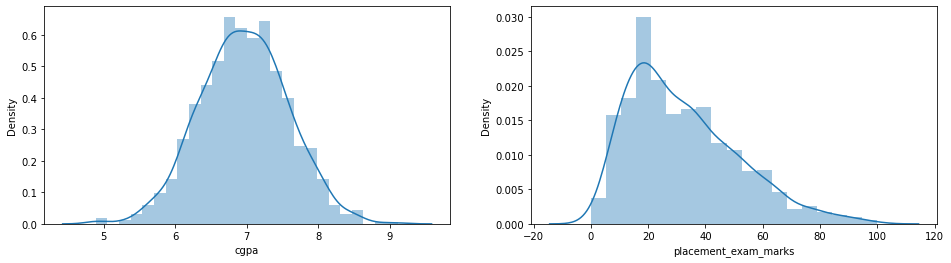

In [6]:
#wap to compare both cgpa & placement exam marks try to viz.
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

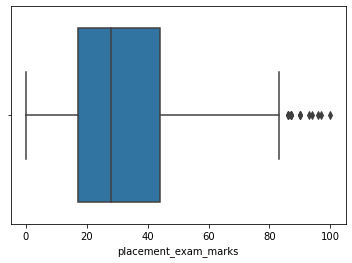

In [8]:
# box plot
sns.boxplot(df['placement_exam_marks'],data = df)

In [10]:
# finding the iQR
per25 = df['placement_exam_marks'].quantile(0.25)

In [11]:
per25

17.0

In [12]:
per75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
per75

44.0

In [14]:
iqr = per75-per25

In [15]:
iqr

27.0

In [16]:
lower_limit = per25-1.5*iqr

In [17]:
lower_limit

-23.5

In [18]:
upper_limit = per75+1.5*iqr

In [19]:
upper_limit

84.5

In [23]:
#wap to find outliers
df[df['placement_exam_marks']>upper_limit].shape

(15, 3)

In [24]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [26]:
# Trimming & capping

# Trimming

newdf = df[df['placement_exam_marks']<upper_limit]

In [27]:
newdf.shape

(985, 3)

In [28]:
df.shape

(1000, 3)

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='placement_exam_marks'>

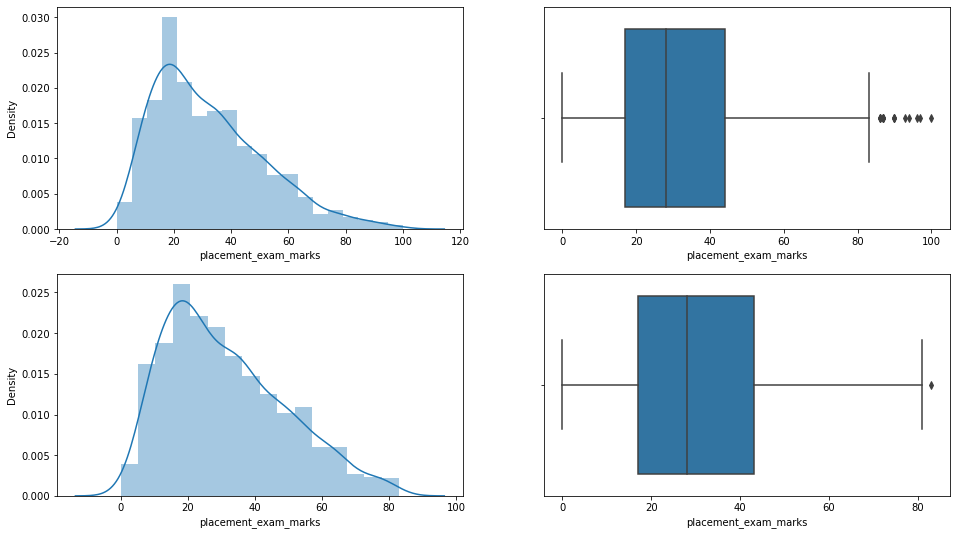

In [34]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])



plt.subplot(2,2,3)
sns.distplot(newdf['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(newdf['placement_exam_marks'])

In [35]:
# capping
newdf_cap = df.copy()

In [36]:
newdf_cap.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [39]:
newdf_cap['placement_exam_marks'] = np.where(
                                    newdf_cap['placement_exam_marks']>upper_limit,
                                    upper_limit,
                                    np.where(
                                    newdf_cap['placement_exam_marks']<lower_limit,
                                    lower_limit,
                                    newdf_cap['placement_exam_marks']))

In [40]:
newdf_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [41]:
newdf_cap['placement_exam_marks'].unique()

array([26. , 38. , 40. ,  8. , 17. , 23. , 11. , 39. , 84.5, 16. ,  7. ,
       43. , 21. , 19. , 22. , 27. , 29. , 47. , 33. , 54. , 58. , 46. ,
       15. , 44. ,  9. , 12. , 20. , 71. , 63. , 55. , 10. , 42. , 28. ,
       18. , 36. , 24. , 32. , 31. , 52. , 30. ,  3. , 56. , 35. ,  6. ,
       76. , 77. , 37. ,  0. , 51. , 25. , 53. , 64. ,  5. , 41. , 49. ,
       34. , 81. , 50. , 59. , 48. , 45. , 14. , 57. , 60. , 78. , 13. ,
       62. , 65. ,  4. , 68. , 70. , 79. , 61. , 66. , 83. , 75. , 67. ,
       80. , 74. , 72. , 69. ,  2. ])

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='placement_exam_marks'>

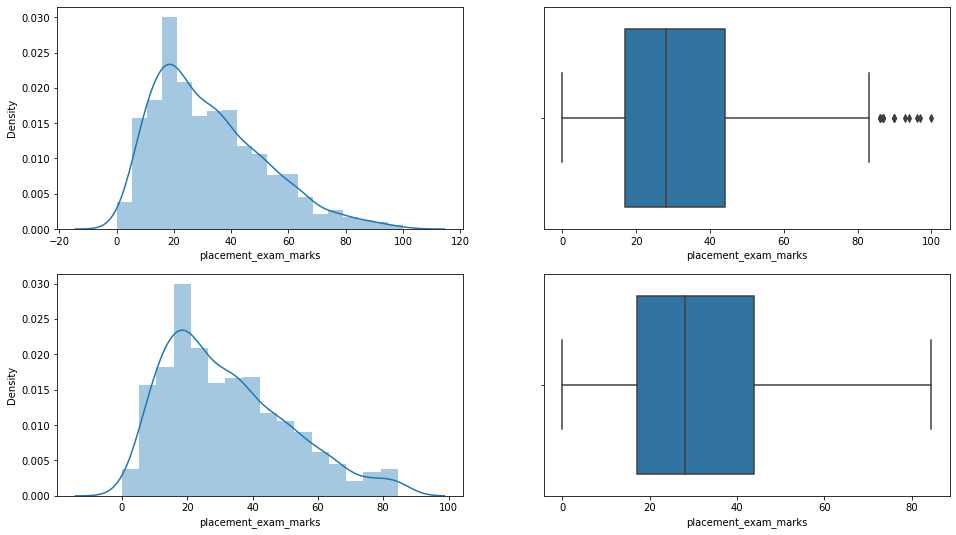

In [42]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])



plt.subplot(2,2,3)
sns.distplot(newdf_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(newdf_cap['placement_exam_marks'])